In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import importlib
import pandas as pd
import matplotlib.gridspec as gridspec
import time

import sys
sys.path.append('../scripts')

import sirs
import params
import plotting
from params import cols

from pylab import cm
import matplotlib as mpl
from matplotlib import colors

plotting.set_rcParams()

This notebook provides code to plot the largest lyapunov exponent, mean infection numbers and the peaks per year in the $\tau$-$m_{max}$ plane for different parameter values. It reproduces the figures 8 and 9 of the paper. 

The simulations were performed on a cluster using the code found under scripts/cluster/SIRS...py

In [5]:
windingnumbers,windingnumberlabels,cmap = plotting.get_arnold_cmap()

In [6]:

def cluster_plot(ax,Data,what,cmap='RdBu_r',xlim=None,ylim=None,tol=0.02):
    cluster_tauline = Data['tau_vec']
    cluster_mmaxline = Data['M_max_vec']
    cluster_M_LLE = 360*Data[what][:,:]
    
    idx1 = 0
    idx2 = -1
    idy1 = 0
    idy2 = -1
    
    if xlim and ylim:
        idx1 = round((xlim[0]-cluster_tauline[0])/(cluster_tauline[-1]-cluster_tauline[0])*len(cluster_tauline))
        idx2 = round((xlim[1]-cluster_tauline[0])/(cluster_tauline[-1]-cluster_tauline[0])*len(cluster_tauline))
        idy1 = round((ylim[0]-cluster_mmaxline[0])/(cluster_mmaxline[-1]-cluster_mmaxline[0])*len(cluster_mmaxline))
        idy2 = round((ylim[1]-cluster_mmaxline[0])/(cluster_mmaxline[-1]-cluster_mmaxline[0])*len(cluster_mmaxline))
        cluster_tauline = cluster_tauline[cluster_tauline>=xlim[0]]
        cluster_tauline = cluster_tauline[cluster_tauline<=xlim[1]]  
        cluster_mmaxline = cluster_mmaxline[cluster_mmaxline>=ylim[0]]
        cluster_mmaxline = cluster_mmaxline[cluster_mmaxline<=ylim[1]]
        
    cluster_M_LLE = np.flip(np.flip(cluster_M_LLE[idy1:idy2,idx1:idx2]),axis=1)
    
    if what == 'Imean':
        cluster_M_LLE[cluster_M_LLE<0] = 0
        show = ax.imshow(cluster_M_LLE,aspect='auto', extent=(cluster_tauline.min(), cluster_tauline.max(), cluster_mmaxline.min(), cluster_mmaxline.max()), \
          cmap='GnBu_r',interpolation='None',vmin=0)
    
    elif what == 'LLE':
        divnorm = colors.TwoSlopeNorm(vmin=np.min(cluster_M_LLE), vcenter=0., vmax=np.max(cluster_M_LLE))   
        show = ax.imshow(cluster_M_LLE,aspect='auto', extent=(cluster_tauline.min(), cluster_tauline.max(), cluster_mmaxline.min(), cluster_mmaxline.max()), \
          cmap='RdBu_r',interpolation='None',norm=divnorm)
        
    elif what == 'Winding':
        matrix = np.zeros(np.shape(cluster_M_LLE))
        windingnumbers = [1,5/4,4/3,3/2,5/3,2,5/2,3]
        for tongues in windingnumbers:
            matrix += np.where(np.abs(cluster_M_LLE-tongues)<=tol,tongues,0)
        from pylab import cm
        cmap = cm.get_cmap('YlGnBu',len(windingnumbers)+1)
        cmaplist = [cmap(i) for i in range(cmap.N)]
        cmaplist[-1] = (0, 0, 0, 1.0)
        cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
        Mrev = matrix.copy()
        for j,t in enumerate(windingnumbers):
            Mrev[matrix==t] = j+1
        Mrev[matrix==0] = len(windingnumbers)+2
        show = ax.imshow(Mrev,aspect='auto', extent=(cluster_tauline.min(), cluster_tauline.max(), cluster_mmaxline.min(), cluster_mmaxline.max()), \
          cmap=cmap,interpolation='None')
        
    else:
        return None
    print('Max val:',np.max(cluster_M_LLE),'Min val:',np.min(cluster_M_LLE))
    return show 

def get_data(param,value):
    

    clusterpath = '../simulations/cluster/sensitivity/'
    clusterparam = f'{param}/'
    clustervalue = f'{value}/'
    clusterfile = 'InfectionData'
    clustertype = '.npz'

    clusterfile_LLE = 'InfectionData_LLE'
    Data = np.load(clusterpath+clusterparam+clustervalue+clusterfile+clustertype)
    return Data 

How to use:

1) call the function get_data. the first argument is the parameter that one wants to change (compared to the default parameters used in the paper). The second argument is the value of the parameter. If we want to use beta=0.5 we call get_data('beta','05_fine'), if we wanted to use beta=0.4 we would call get_data('beta','04_fine').
2) call the cluster_plot function and indicate the axis on which to plot, pass the data and indicate what to plot as the third argument. Possible things to plot: 'LLE' for largest lyapunov exponent, 'Imean' for mean infection numbers and 'Winding' for the winding number (peaks per year). 

Max val: 0.6091517571111059 Min val: -7.046481444180377


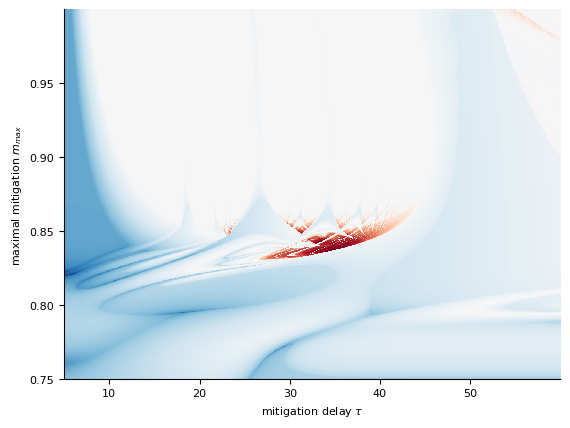

In [7]:
data = get_data('beta','05_fine')

fig,ax = plt.subplots()

show = cluster_plot(ax,data,'LLE',cmap='GnBu_r')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');

Max val: 7.233849891065346 Min val: 0.0


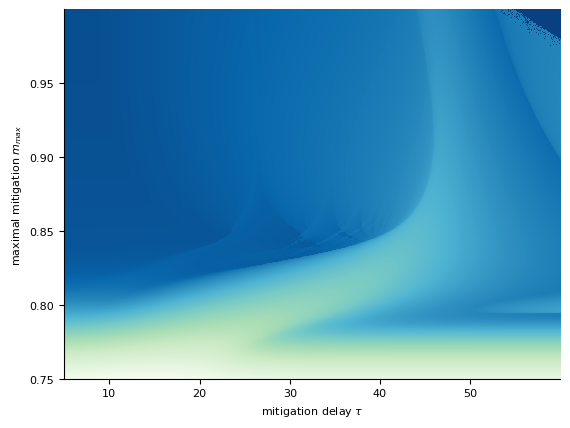

In [8]:
data = get_data('beta','05_fine')

fig,ax = plt.subplots()

show = cluster_plot(ax,data,'Imean')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');

C:\Users\jwagner\AppData\Local\Temp\ipykernel_14788\706860926.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu',len(windingnumbers)+1)


Max val: 7.2414482896579315 Min val: 0.0


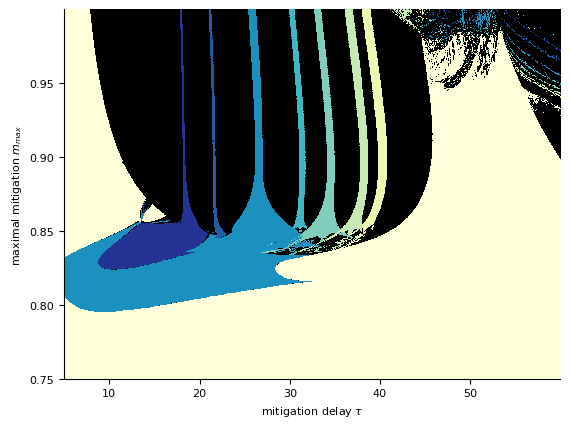

In [9]:
data = get_data('beta','05_fine')

fig,ax = plt.subplots()

show = cluster_plot(ax,data,'Winding')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');

### Figure 8

Max val: 0.6091517571111059 Min val: -7.046481444180377
Max val: 7.2414482896579315 Min val: 0.0
Max val: 7.233849891065346 Min val: 0.0


C:\Users\jwagner\AppData\Local\Temp\ipykernel_15104\706860926.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu',len(windingnumbers)+1)


Max val: 0.6006144083354862 Min val: -6.447108368271475
Max val: 6.05371074214843 Min val: 0.0
Max val: 7.15229828263418 Min val: 0.0
Max val: 0.4322638444107489 Min val: -6.81475984018885
Max val: 4.490898179635927 Min val: 0.0
Max val: 7.048047427275578 Min val: 0.0
Max val: 0.511927212223989 Min val: -6.609076660305352
Max val: 3.0006001200240044 Min val: 0.0
Max val: 6.895079692871636 Min val: 0.0


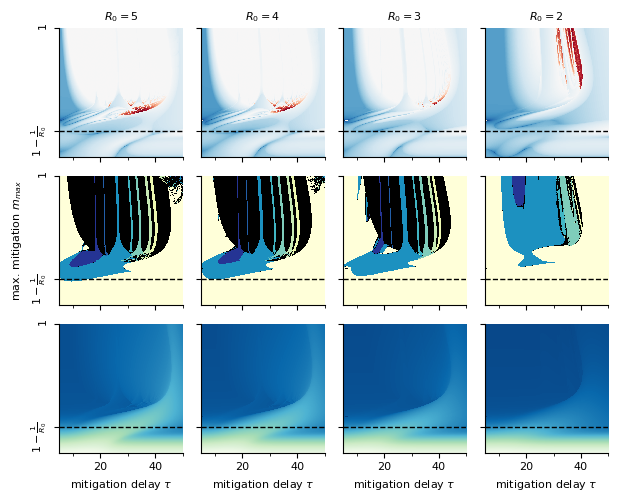

In [26]:
cm = 1/2.54
fig = plt.figure(figsize=(18*cm,14*cm))

gs = gridspec.GridSpec(nrows=3, ncols=4, wspace=0.15, hspace=0.15)


for _,run,beta in zip([0,1,2,3],['05_fine','04_fine','03_fine','02_fine'],[5,4,3,2]):

    axs = [0]*3
    for i in range(3):
        axs[i] = fig.add_subplot(gs[i,_])

        
    axs[0].set_title(f'$R_0={beta}$')
    axs[2].set_xlabel(r'mitigation delay $\tau$')
    
    for i,what in enumerate(['LLE','Winding','Imean']):
        data = get_data('beta',run)
        cluster_plot(axs[i],data,what)

        axs[i].set_xlim(None,50)
        axs[i].hlines(1-1/beta,5,50,ls='--',lw=1,color='black')
        axs[i].set_xticks([20,40])
        axs[i].set_xticks([10,30,50],minor=True)
        if _ != 0:
            axs[i].set_yticks([1-1/beta,1])
            axs[i].set_yticklabels(['',''])
        else:
            axs[i].set_yticks([1-1/beta,1])
            axs[i].set_yticklabels([r'$1-\frac{1}{R_0}$','$1$'],rotation=90)
            axs[1].set_ylabel('max. mitigation $m_{max}$')
        if i != 2:
            axs[i].set_xticklabels(['',''])


### Figure 9

Max val: 0.34339905829252687 Min val: -6.322706832805533
Max val: 6.768353670734147 Min val: 0.0
Max val: 1.7141576846510844 Min val: 0.0


C:\Users\jwagner\AppData\Local\Temp\ipykernel_15104\706860926.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu',len(windingnumbers)+1)


Max val: 0.7685921619133999 Min val: -6.222440344330743
Max val: 9.968993798759753 Min val: 0.0
Max val: 9.20376248996382 Min val: 0.0


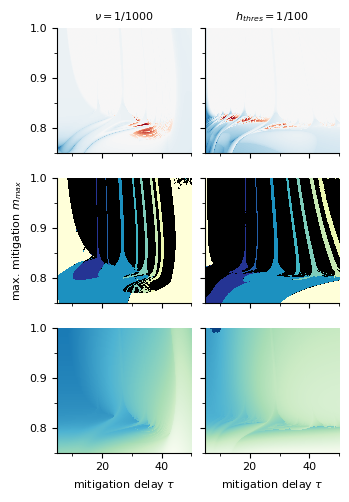

In [27]:
cm = 1/2.54
fig = plt.figure(figsize=(9.25*cm,14*cm))

gs = gridspec.GridSpec(nrows=3, ncols=2, wspace=0.1, hspace=0.2)


for _,run,val,param,title in zip([0,1],['0001','001'],['1/1000','1/100'],['nue','hthres'],[r'$\nu = 1/1000$','$h_{thres}=1/100$']):

    axs = [0]*3
    for i in range(3):
        axs[i] = fig.add_subplot(gs[i,_])

        
    axs[0].set_title(title)
    axs[2].set_xlabel(r'mitigation delay $\tau$')
    
    for i,what in enumerate(['LLE','Winding','Imean']):
        data = get_data(param,run)
        cluster_plot(axs[i],data,what)
        #axs[i].set_aspect(1/axs[i].get_data_ratio(),adjustable='box')
        axs[i].set_xlim(None,50)
        axs[i].set_xticks([20,40])
        axs[i].set_xticks([10,30,50],minor=True)
        
        axs[i].set_yticks([0.8,0.9,1])
        axs[i].set_yticks([0.75,0.85,0.95],minor=True)
        if _ != 0:
            axs[i].set_yticklabels(['','',''])
        else:
            axs[1].set_ylabel('max. mitigation $m_{max}$')
        if i != 2:
            axs[i].set_xticklabels(['',''])
        
